# Knn Classifier

In [2]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df_train = pd.read_csv("../data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [12]:
df_test = pd.read_csv("../data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


In [6]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,...,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,3.887230,3.247444,4.200222,5.324560,3.989476,4.340333,3.447893,10.084506,5.373670,4.897820,...,23.449745,12.409305,7.165364,7.072646,7.694301,8.809542,7.718414,11.913271,11.655399,0.281617
std,11.550812,12.227142,12.514285,17.091833,12.534773,12.204286,12.421243,19.859523,17.489644,15.260643,...,40.539643,21.509683,16.409593,21.167116,18.220843,24.263310,23.069898,21.349509,21.704520,0.449817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.282357,0.000000,0.000000,...,32.965056,17.737343,4.382578,0.000000,4.559304,0.000000,0.000000,16.960001,15.673463,1.000000
max,116.249710,135.118362,106.883446,149.036377,110.275520,98.195953,181.465195,137.014618,178.688629,147.352890,...,306.928009,162.855591,127.336914,229.924103,143.816956,217.305252,225.921432,187.903152,189.659103,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7670 non-null   float64
 1   1       7670 non-null   float64
 2   2       7670 non-null   float64
 3   3       7670 non-null   float64
 4   4       7670 non-null   float64
 5   5       7670 non-null   float64
 6   6       7670 non-null   float64
 7   7       7670 non-null   float64
 8   8       7670 non-null   float64
 9   9       7670 non-null   float64
 10  10      7670 non-null   float64
 11  11      7670 non-null   float64
 12  12      7670 non-null   float64
 13  13      7670 non-null   float64
 14  14      7670 non-null   float64
 15  15      7670 non-null   float64
 16  16      7670 non-null   float64
 17  17      7670 non-null   float64
 18  18      7670 non-null   float64
 19  19      7670 non-null   float64
 20  20      7670 non-null   float64
 21  21      7670 non-null   float64
 22  

## Remove target from dataframe

In [14]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,22.180500,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,44.849247,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,11.773044,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,0.000000,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742


## Normalize and split dataframe

In [15]:
# Normalize dataset

scaler_train = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = MinMaxScaler()
X_test = scaler_test.fit_transform(X_test)


## Create KNN model and get the best "k"

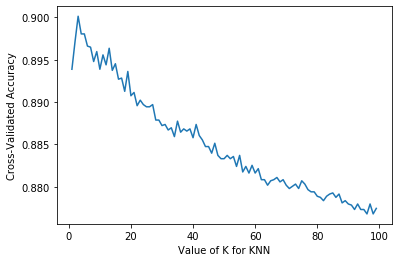

The best k is:  3
The best accuracy is:  0.9001303780964797


In [16]:

k_value = 0
k_index = 0
k_scores = []
k_miss = []

for i in range(1, 100):    
    print("Status:", i+1, "/", "100", end="\r")

    scores = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_train, y_train, cv=5)
    accuracy = scores.mean()
    k_scores.append(scores.mean())
    k_miss.append(1 - scores.mean())
    
    if(accuracy > k_value):
        k_value = accuracy
        k_index = i 
    
    

plt.plot(range(1, 100), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print('The best k is: ', k_index)
print('The best accuracy is: ', k_value)

## Plot confusion matrix to analyse predictions

In [20]:
classifier = KNeighborsClassifier(n_neighbors=k_index)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)


In [15]:
fig = plot.get_figure()
fig.savefig('cfm.png')

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2360
           1       0.82      0.86      0.84       925

    accuracy                           0.91      3285
   macro avg       0.88      0.89      0.89      3285
weighted avg       0.91      0.91      0.91      3285



In [19]:
print(classifier.score(X_test,y_test))

0.9071537290715372


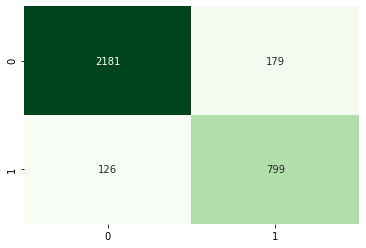

In [21]:
plot = sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [ ]:
fig = plot.get_figure()
fig.savefig('cfm.png')